# Lesson 6 - Starter Code

In [1]:
# Imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import sklearn.linear_model

# MAGIC!
%matplotlib inline

# Section 1: Intro

### Explore our mammals dataset

In [2]:
# read in the mammal dataset
wd = '../../assets/dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

In [3]:
mammals.head(2)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019


### Lets check out a scatter plot of body wieght and brain weight

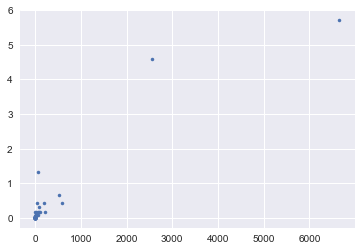

In [4]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()

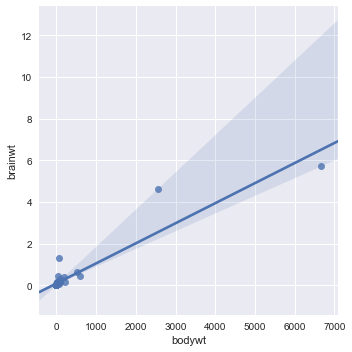

In [5]:
sns.lmplot('bodywt', 'brainwt', mammals)

In [6]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy() #so that you don't overrride mammals
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)
#log is taking whatever number you have and make it an exponent of 10
#.apply applies a function onto the columns

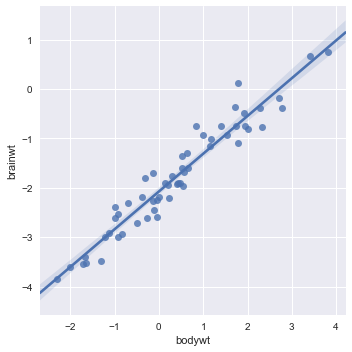

In [7]:
sns.lmplot('bodywt', 'brainwt', log_mammals)

# Section 1: Exercise

## Guided Practice: Using Seaborn to generate single variable linear model plots (10 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


In [8]:
log_columns = ['bodywt', 'sleep_rem','awake']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)
#create the graph first without transforming it to determine if the graph doesn't need to be transformed. If you 
#do the log transform and it looks the same then you dont need to transform it

##### Complete below for two separate models using log_mammals: one with sleep_rem and another with awake as a y, with variables you've already used as x.


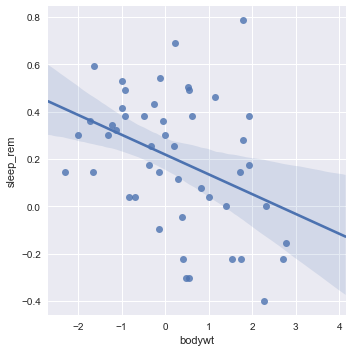

In [9]:
#log_mammals.columns
sns.lmplot('bodywt', 'sleep_rem', log_mammals)

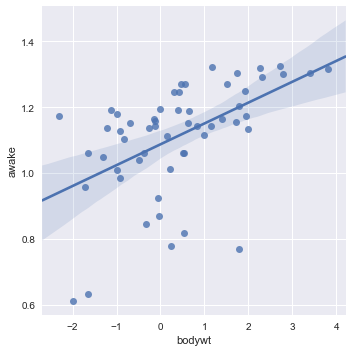

In [10]:
sns.lmplot('bodywt', 'awake', log_mammals)

# Section 2: Intro

## Introduction: Single Regression Analysis in statsmodels & scikit

In [11]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()
#print the full summary
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           9.16e-26
Time:                        21:21:00   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use Statsmodels to make the prediction

In [12]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [80]})
X_new.head()
#Estimated brain weight
lm.predict(X_new)

array([ 0.16303325])

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals:

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


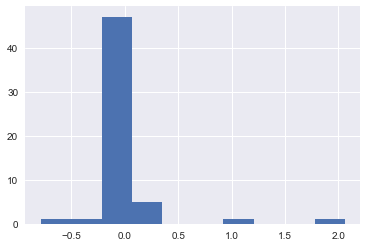

In [13]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals)
    # keep the model
    return algo

X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

### What does our output tell us?

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* The model explains, roughly, 87% of the variance of the dataset (the largest errors being in the large brain and body sizes)  
* With this current model, brainwt is roughly bodywt * 0.00096395  
* The residuals, or error in the prediction, is not normal, with outliers on the right.

P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451
[ 0.          0.01965816  0.07863264]


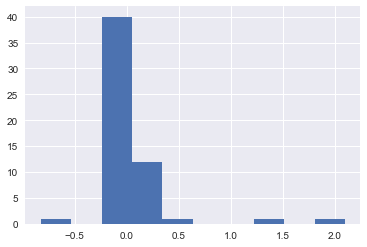

In [14]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print lm.predict([[0], [20], [80]]) #brain weight

## Section 2: Exercise (15 minutes)

#### 1) Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, predict the following dataset in one line:

* [0, 20, 2000, 350, 200]

Then, explain the model to an 8 year old

In [15]:
print lm.predict([[0], [20], [2000], [350], [200]])

[ 0.          0.01965816  1.96581607  0.34401781  0.19658161]


In [16]:
#if you predict body weight is 20, then brain weight is .01966

#### 2) Using the LinearRegression object

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

* With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. 

* Complete the following code to update X and y to match the log-transformed data. 

* Complete the loop by setting the list to be one True and one False.

y-intercept: True
P Values: [  9.07745015e-06]
Coefficients: [ 0.39112921]
y-intercept: 0.123382787709
R-Squared: 0.30790685013
y-intercept: False
P Values: [  9.07745015e-06]
Coefficients: [ 0.41549409]
y-intercept: 0.0
R-Squared: 0.292947414676
P Values: [  9.07745015e-06]
Coefficients: [ 0.41549409]
y-intercept: 0.0
R-Squared: 0.292947414676
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)


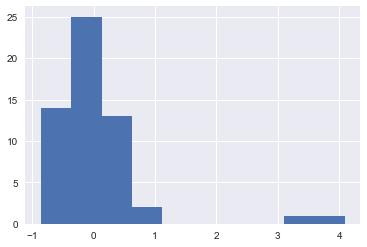

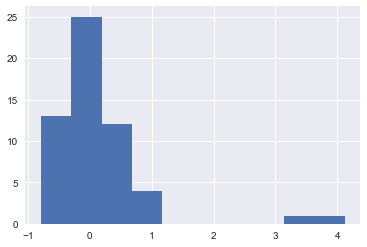

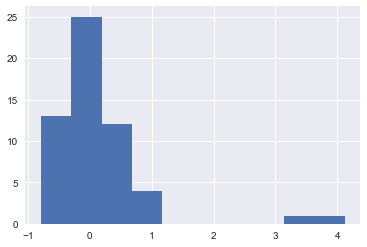

In [17]:
#starter
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']
loop = [True, False]
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)     

print get_linear_model_metrics(X, y, lm)
#y intercept allows us to know where to fit the line. It produces a higher accuracy when you introduce the y intercept

#### Which model performed the best? The worst? Why?


Answer: 

#### 3) Advanced Methods! (Optional)

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  9.07745015e-06]
Coefficients: [ 0.]
y-intercept: 0.281581428571
R-Squared: 0.0

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [  9.07745015e-06]
Coefficients: [ 0.38745795]
y-intercept: 0.124867689697
R-Squared: 0.307879722651

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  9.07745015e-06]
Coefficients: [ 0.09944004]
y-intercept: 0.241361267774
R-Squared: 0.136661239489



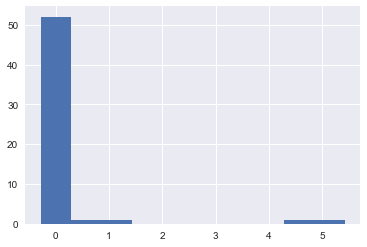

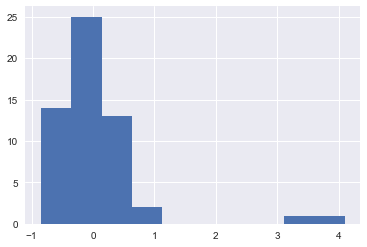

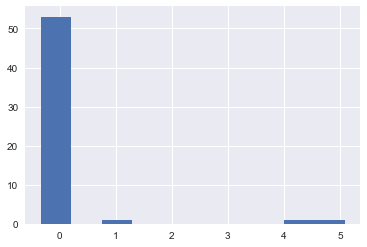

In [18]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print


# Exercise 3: Intro

## Introduction: Multiple Regression Analysis using citi bike data


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the Y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [19]:
#wd = '../../assets/dataset/bikeshare/'
#bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data = pd.read_csv('../../assets/dataset/bikeshare/bikeshare.csv')
bike_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.755)


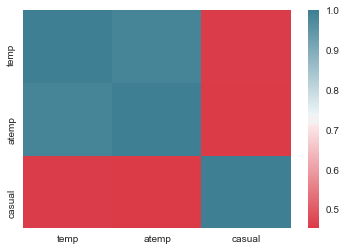

In [20]:
cmap = sns.diverging_palette(10, 220, as_cmap=True) #creates colors below

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### What does the correlation matrix explain?

Answer: 

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(3):
    print bike_data[['temp', 'atemp', 'casual']].columns[i]
    print vif(bike_data[['temp', 'atemp', 'casual']].as_matrix(), i) #If > 5, starting to be highly collinear with other explanatory variables, large standard errors

temp
286.881122385
atemp
283.420765246
casual
1.87842265937


In [22]:
#if vif>5 then you have high collinearity.

#### We can measure this effect in the coefficients:



temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



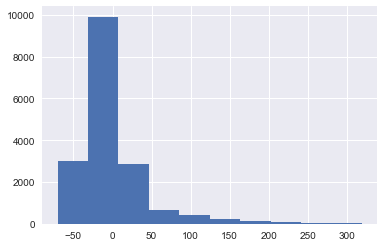

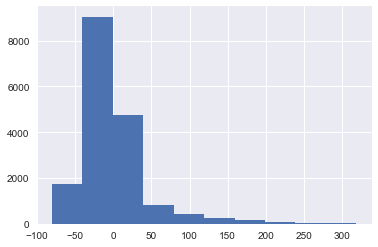

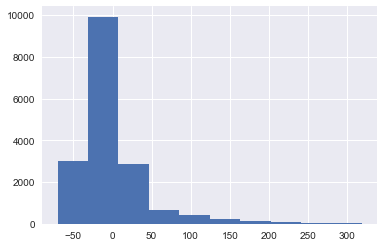

In [23]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
) 
#the third is both togethor (see third section). if two are highly coorelated, pick the one with the higher R^2

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation?

Answer: 

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

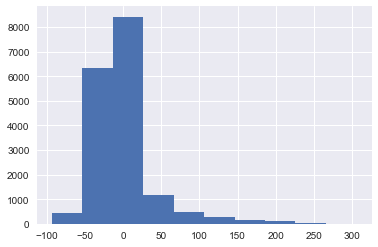

In [24]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())
#print vif(bike_data[['temp', 'hum', 'casual']].as_matrix(), 1)

## Multicollinearity with dummy variables



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

#### What happens to the coefficients when you include all weather situations instead of just including all except one?

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  5.33996323e+12   5.33996323e+12   5.33996323e+12   5.33996323e+12]
y-intercept: -5.33996323254e+12
R-Squared: 0.0233906300439
P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666667
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

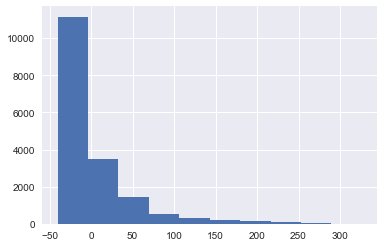

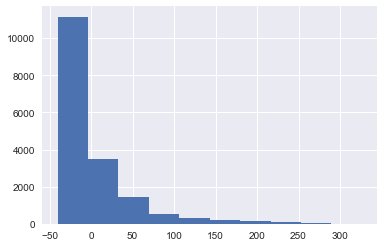

In [25]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)

# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

### Similar in Statsmodels

In [26]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           1.38e-87
Time:                        21:21:03   Log-Likelihood:                -92198.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                -3.565e+13    4.6e+13     -0.774      0.439     -1.26e+14  5.46e+13
weather[[1, 2, 3, 4]][0]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][1]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][2]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][3]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
==============================================================================
Omnibus:                     8985.326   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58717.202
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      10.537   Cond. No.                     3.46e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           8.08e-89
Time:                        21:21:03   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer:

# Section 3 : Exercise

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [28]:
bike_data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


           windspeed      temp       hum
windspeed   1.000000 -0.023125 -0.290105
temp       -0.023125  1.000000 -0.069881
hum        -0.290105 -0.069881  1.000000
Axes(0.125,0.125;0.62x0.755)


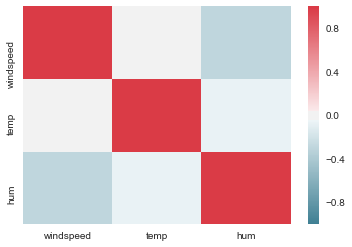

In [40]:
#command backslash comments everything (#/)
#starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join(bike_data[['windspeed', 'temp', 'hum']], lsuffix='x') # add in the three weather situations

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bike_data[['windspeed', 'temp', 'hum']].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = ['windspeedx', 'tempx'] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

P Values: [  6.25145011e-42   0.00000000e+00]
Coefficients: [ 0.61156913  1.88460678]
y-intercept: 0.122586013457
R-Squared: 0.324848176299


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

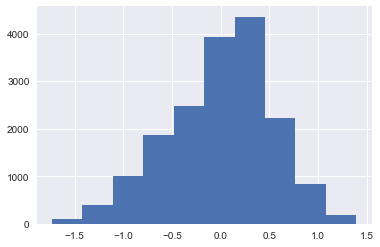

In [41]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)

In [71]:
#Stats models
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
#print the full summary
lm.summary()

NameError: name 'bikemodel_data' is not defined

# More Practice

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!